In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('/Users/etienneleconte/Downloads/Fitbit (1).csv')

In [3]:
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


<AxesSubplot:xlabel='NumberOfAwakings', ylabel='MinutesOfBeingAwake'>

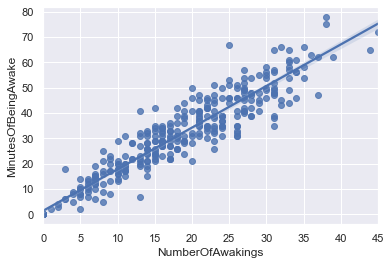

In [4]:
sns.regplot(x='NumberOfAwakings',y='MinutesOfBeingAwake', data=df)

From this viz I see a strong relationship between two columns. Lets build a linear regression for the minutes of being awake: 

y= aplha + beta * x

In [5]:
from statsmodels.formula.api import ols

In [6]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings', data=df)

In [9]:
model_fit=model.fit()

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Mon, 28 Sep 2020   Prob (F-statistic):          1.89e-189
Time:                         10:59:48   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y_pred=model_fit.predict()

In [13]:
df['y_pred']=y_pred

<AxesSubplot:xlabel='NumberOfAwakings', ylabel='y_pred'>

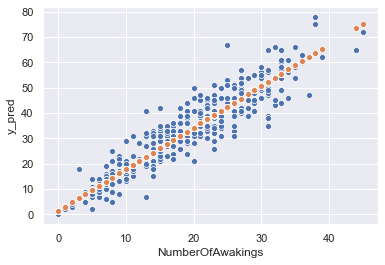

In [16]:
sns.scatterplot(x='NumberOfAwakings',y='MinutesOfBeingAwake', data=df)
sns.scatterplot(x='NumberOfAwakings',y='y_pred', data=df)

<AxesSubplot:>

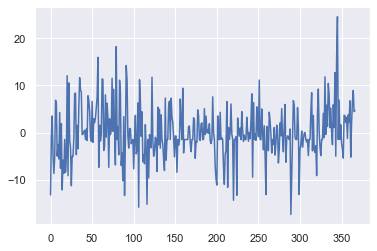

In [17]:
model_fit.resid.plot()

<AxesSubplot:>

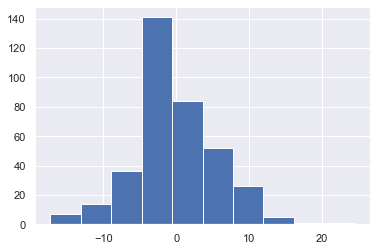

In [18]:
model_fit.resid.hist()

So we have built the model and we see that the minutes of being wake is actually dependent of Nb of awakings. The best fit line model is : 
y = 1.4381 + 1.6405 Nb of awakenings

In [19]:
model=ols('MinutesOfBeingAwake ~NumberOfAwakings + Distance', data=df)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     1794.
Date:                 Mon, 28 Sep 2020   Prob (F-statistic):          3.22e-189
Time:                         11:27:04   Log-Likelihood:                -1154.3
No. Observations:                  367   AIC:                             2315.
Df Residuals:                      364   BIC:                             2326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5001      0.881     -0.567      0.571      -2.233       1.233
NumberOfAwakings     1.6336      0.028     59.332      0.000       1.579       1.688
Distance             0.2398      0.087      2.761      0.006       0.069       0.411
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.472
Skew:                           0.270   Prob(JB):                     8.89e-08
Kurtosis:                       4.353   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df=df.rename({'Calorie burned' : 'CalorieBurned'}, axis=1)

In [22]:
model=ols('MinutesOfBeingAwake ~NumberOfAwakings + CalorieBurned', data=df)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     1757.
Date:                 Mon, 28 Sep 2020   Prob (F-statistic):          1.01e-187
Time:                         11:32:28   Log-Likelihood:                -1157.8
No. Observations:                  367   AIC:                             2322.
Df Residuals:                      364   BIC:                             2333.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7285      1.029      0.708      0.480      -1.296       2.753
NumberOfAwakings     1.6398      0.028     59.217      0.000       1.585       1.694
CalorieBurned        0.0003      0.000      0.809      0.419      -0.000       0.001
==============================================================================
Omnibus:                       17.844   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.937
Skew:                           0.293   Prob(JB):                     1.16e-07
Kurtosis:                       4.321   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.corr().MinutesOfBeingAwake.sort_values()

Activity Calories         0.010859
CalorieBurned             0.041999
Floors                    0.064587
Minutes Lightly Active    0.096107
Minutes Fairly Active     0.104303
Minutes Very Active       0.116559
Steps                     0.124846
Distance                  0.130447
Minutes Sedentary         0.200589
MinutesOfSleep            0.779595
LengthOfRestInMinutes     0.820110
NumberOfAwakings          0.951817
y_pred                    0.951817
MinutesOfBeingAwake       1.000000
Name: MinutesOfBeingAwake, dtype: float64

In [26]:
model=ols('MinutesOfBeingAwake ~NumberOfAwakings + LengthOfRestInMinutes', data=df)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.911
Model:                             OLS   Adj. R-squared:                  0.911
Method:                  Least Squares   F-statistic:                     1870.
Date:                 Mon, 28 Sep 2020   Prob (F-statistic):          3.25e-192
Time:                         11:37:27   Log-Likelihood:                -1147.3
No. Observations:                  367   AIC:                             2301.
Df Residuals:                      364   BIC:                             2312.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0950      0.617     -0.154      0.878      -1.308       1.118
NumberOfAwakings          1.4616      0.047     31.302      0.000       1.370       1.553
LengthOfRestInMinutes     0.0138      0.003      4.688      0.000       0.008       0.020
==============================================================================
Omnibus:                       17.655   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.592
Skew:                           0.290   Prob(JB):                     1.38e-07
Kurtosis:                       4.315   Cond. No.                         777.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the correlogram, we concluded that the only feature apart from nb of awakings that is higly correlated with the output is length of rest in minutes 

After building the model we can see that our intercept became insignificant, which is not the best situation, so we reject this model and come back to the original one (simple linear regression)